# A short introduction to Tensorflow

Neural network are the current hype technologies of machine learning and it is so for a good reason. In NLP they allowed models to answer text-based questions with human-level accuracy, or to get sentiment and context way better than anything before them.

Most basic neural network types are:
- FCN (fully connected network),
- CNN (convolutional network),
- RNN (recursive neural network).

All of them are used for plethora of tasks, but CNN take prime in image-related jobs, while RNNs excel when it comes to text understanding.

## Machine learning introduction

Machine learning is a way to implement artificial intelligence. Deep learning is a subset of machine learning. We divide machine learning into shallow and deep learning methods. **Artificial Intelligence** is about algorithms that behave like intelligent human being. Steven Spielberg's A.I. movie present robots that behave like humans. Almost like humans. Such robots like shown in the movie are still to be more fiction rather then science.

![](images/from_ai.png)

**Machine learning** is very often misunderstood to be the same as pattern recognition, deep learning or artificial intelligence. The reason that those terms are used as synonyms is that all has many in common and are easily generalized especially by everyone without knowledge about the differences. There are many definitions for machine learning. Machine learning is about algorithms that learn new behavior based on data. We are able to teach the algorithm, so that it can predict unknown before cases. The prediction process is also known as classification or **predictive analytics**. There is a huge set of such algorithms that are called classification methods.

The whole process consist of a few steps:

1. Assemble data
2. Data set preprocessing
3. Feature extraction
4. Feature selection
5. Training
6. Prediction
7. Validation

The machine learning process consists of three major parts: training, testing and retraining phases. The last part is discussed in a separate notebook.

![](images/machine_learning.png)

## Tensorflow basics

First things first: __tensors__. Those are N-dimensional matrices (usually 2D/3D) constituting building blocks of framework's computation:

In [4]:
import tensorflow as tf

# That's how you make constant value in low-level Tensorflow
x = tf.constant(3, dtype=tf.float32)
# We can omit type if it's float32 (it usually is)
y = tf.constant(4.0)
tensor = x * y
tensor

<tf.Tensor 'mul:0' shape=() dtype=float32>

Surprisingly this __does not__ return us the values contained inside the Tensor, but the object. This object is a __static graph__, which represents
multiplication of two constant values.

Graph can be divided into two parts:
-__ops (operations)__ - graph nodes, describing calculations consuming and producing tensors,
-__tensors__ - graph edges, represent values flowing through operations.

For it to be evaluated we need to run it inside __session__, which is a mechanism used for running and providing values to graph.

Before it, please notice the type is inferred from the value passed to it.
If we didn't specify `tf.float32` it would be `tf.int64` and those types are __incompatible__ in Tensorflow.

In [44]:
with tf.Session() as session:
    print(session.run(tensor))

12.0


__REMEMBER:__ for any operation to be run and produce actual value you need to pass it to session.

Before moving on we have to introduce other Tensor types provided by the framework:
- __tf.placeholder__: placeholder for the value we will input later and turn into concrete value. Good analogy could be y = f(x), where x only represents some value.
- __tf.Variable__: unlike __tf.Constant__ seen above, this tensor can change it's value during session execution. They __have to__ be initialized (in high level APIs it is done for you).

Now, we can dive into some basic ML model to see how all the elements fit together:

### Linear regression with Tensorflow

A bit more complex example is linear regression. We want to predict $y$ that depends on $x$ values, weights and bias. Linear regression can be written as: $y=wx+b$. 

Let's set the train dataset:

In [5]:
import numpy as np

X_train = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y_train = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X_train.shape[0]

We can plot the data and see the trend. Visually it's easy to predict $y$ for a given $x$:

(1, 4)

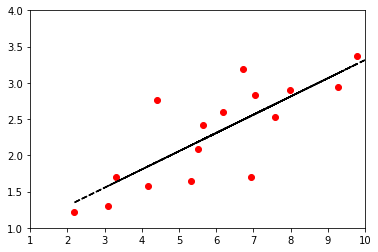

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

fit = np.polyfit(X_train,Y_train,1)

fit_fn = np.poly1d(fit) 

plt.plot(X_train, Y_train, 'ro', X_train, fit_fn(X_train), '--k')
plt.xlim(1, 10)
plt.ylim(1, 4)

The next step is to setup Tensorflow tensors: 

In [7]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights and bias to random
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

#### Exercise 1: Build a linear regression model with tensorflow

The goal is to build the flow between the tensors and get the $y=xw+b$. Use the add and multiply methods provided by Tensorflow. More about both methods: [add](https://www.tensorflow.org/api_docs/python/tf/math/add), [multiply](https://www.tensorflow.org/api_docs/python/tf/math/multiply).

Epoch: 0100 cost= 0.215932518 W= 0.4579907 b= -0.69772786
Epoch: 0200 cost= 0.185680300 W= 0.4339391 b= -0.52470237
Epoch: 0300 cost= 0.162011743 W= 0.41266352 b= -0.37164634
Epoch: 0400 cost= 0.143494502 W= 0.39384314 b= -0.2362549
Epoch: 0500 cost= 0.129007638 W= 0.377195 b= -0.11648907
Epoch: 0600 cost= 0.117674299 W= 0.36246818 b= -0.010545683
Epoch: 0700 cost= 0.108808234 W= 0.34944108 b= 0.083170526
Epoch: 0800 cost= 0.101872563 W= 0.3379175 b= 0.16607083
Epoch: 0900 cost= 0.096447177 W= 0.3277238 b= 0.23940349
Epoch: 1000 cost= 0.092203394 W= 0.31870648 b= 0.30427298
Optimization Finished!
Training cost= 0.09220339 W= 0.31870648 b= 0.30427298 



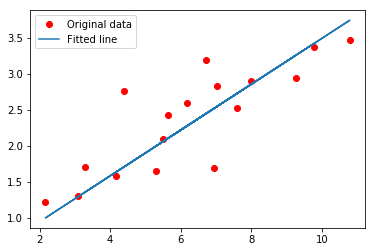

Testing... (Mean square loss Comparison)
Testing cost= 0.08234259
Absolute mean square loss difference: 0.009860806


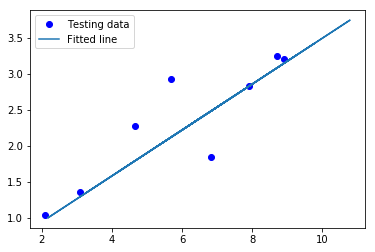

In [8]:
%matplotlib inline

# parameters:
learning_rate = 0.01
training_epochs = 1000
display_step = 100


pred = # add code here


cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, Y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:Y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: Y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(X_train, Y_train, 'ro', label='Original data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    X_test = np.array([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    Y_test = np.array([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
        
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * X_test.shape[0]),
        feed_dict={X: X_test, Y: Y_test})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(X_test, Y_test, 'bo', label='Testing data')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()    

The loss function and optimizers are explained in a separate notebook later in this course.

### Logistic regrssion 

Let's go further and build a bit more complex method. In this case we use the MNIST dataset which consist of number images. In the first step we need to prepare the dataset. MNIST can be easily taken from Keras datasets. We need to prepared batches of data for easier training. A batch is a smaller part of the training set. 

In [10]:
import numpy as np
import pandas as pd

def batch_dataset(x_train, y_train, batch_size: int):
    # How many batches will be there in total?
    batch_count = np.ceil(len(y_train)/batch_size)
    # Split them (uneven parts supported as well)
    return np.array_split(x_train, batch_count), np.array_split(y_train, batch_count)

def prepare_dataset():
    # Get MNIST dataset using high-leval Keras API as it is the easiest way
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Quantization not possible, you should use float values throughout TF
    x_train, x_test = x_train / 255.0, x_test / 255.0
    # Flatten 28*28 matrix into 784 vector
    x_train, x_test = x_train.reshape(len(x_train), -1), x_test.reshape(len(x_test), -1)

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = prepare_dataset()

The logistic regression looks similar as the linear, but instead of the linear function, we have the logistic function or as in this example the softmax function that can be written as:
```
tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis),
```
where ```logits``` is a tensor.

In [49]:
# Set tensorflow to log more informations
tf.logging.set_verbosity(tf.logging.INFO)

def create_logistic_regression(optimizer = None):
    # Setup optimizer we would like to use
    if optimizer is None:
        optimizer = tf.train.GradientDescentOptimizer(0.01)
    # None is the batch size, in placeholder one value can be unspecified
    # We can easily change batch size that way.
    # Those will be fed in our session in each iteration
    x = tf.placeholder(tf.float32, [None, 28*28]) # Each image has shape 28*28=784
    y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

    # 10 columns, each for one digit, essentially we are training 10 logistic regressions
    weights = tf.Variable(tf.zeros([28*28, 10])) # 784 weights of logistic regression model, 
    biases = tf.Variable(tf.zeros([10])) # Biases for each of 0-9 digits

    predictions = tf.nn.softmax(tf.matmul(x, weights) + biases) # Logistic Regression using softmax

    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(predictions), reduction_indices=1))
    # Minimization of cost function using our optimizer
    optimization = optimizer.minimize(cost)

    # predictions for evaluation, optimization for training, x and y to be fed in session
    return predictions, optimization, x, y

The output can be represented as a one-hot matrix that can be drawn as:
![](images/onehot.png)

#### Exercise 2: Get the prediction

This exercise consist of two tasks:
1. Get the list contains booleans as output variable
2. Count the number of properly predicted numbers

In [50]:
# Encode targets as one-hot vectors, e.g. 5 will be turned into [0,0,0,0,0,1,0,0,0]
y_train, y_test = (pd.get_dummies(y_train).values, pd.get_dummies(y_test).values)

# Turn dataset into batches
(x_train, y_train) = batch_dataset(x_train, y_train, batch_size=128)

# Create our model and get needed operations and tensors inside session
predictions, optimization, x, y = create_logistic_regression()
output = []
with tf.Session() as session:

    # Initialize all trainable variables in our model (weights and biases)
    session.run(tf.global_variables_initializer())

    for epoch in range(10):
        # Loop over all batches
        for X_batch, y_batch in zip(x_train, y_train):
            # we only run optimization
            session.run(optimization, feed_dict={x: X_batch, y: y_batch})

    # What predictions occured to be correct? We use feedable y value and feedable
    # predictions as two separate yet intertwined graphs
    correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    # Calculate accuracy (rememeber it is still a tensor!) by taking the mean
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    # Eval is like session run but more concise
    print("Accuracy:", #your code goes here)

    ############
    # fill here:
    ############
    output = #

Accuracy: 0.9005


In [58]:
print("Output:" + str(output) +". Total number of cases: "+ str(len(output)))

### fill here:
passed = None
###

print("Number of properly predicted numbers: "+ passed)

Output:[ True  True  True ...  True  True  True]. Total number of cases: 10000
Number of properly predicted numbers: 9005


## Low-level API

Low-level API allows us to do a lot more (distributed computations with granular control, tensor namespaces to names just two features), but it should be noted that __you are encouraged__ to __not use it__ unless you absolutely have to.
Reasons should be pretty obvious by now: it is unreadable and really hard to follow, even for the easiest models.

Furthermore, if you want to go and learn more, you should read documentation about __MonitoredSession__ and __MonitoredTrainingSession__, as those allow you to get more insight inside learning process (logs were removed from the example in order to leave the code somewhat uncluttered).

To solve this trouble __Tensorflow__ included three high level APIs:
- __tf.Estimator__: seems to be de facto standard and direction of the project. With Tensorflow 2.0 around the corner it is a pretty safe bet, that this is the one with most chances to be continued in the future.
- __tf.Eager__: newest Google's baby. It's construction looks pretty similiar to biggest FOSS rival __PyTorch__. We will not use it here, though I encourage you to do it on your own.
- __tf.keras__: actually it is a standalone library as well, acting as a wrapper over low-level libraries like Tensorflow or (unmaintained) Torch (ex biggest library).

As Keras became more and more dependent on Tensorflow's developers it eventually got included inside Tensorflow itself. I think it is the easiest and most intuitive out of the three, will be used extensively in this course.

Actually there are or were other APIs, but those only further clutter, the already cluttered, image of the library. Worth mentioning is __tf.contrib__ as it's community-centered and you can find various useful models/building-blocks inside.

Lot of talk, no code, let's change it and start with __tf.Estimator__. I will show you how to build IRIS dataset classifier, but before that you need to look at overview of how different API components with with __tf.Estimator__:

## Feed forward neural network

In this case we load again the MNIST dataset, but this time without one_hot. We build a neural network with two hidden layers.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/home/codete/workshop/datasets/mnist/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/codete/workshop/datasets/mnist/train-images-idx3-ubyte.gz


The training parameters are similar then in the previous example:

In [8]:
learning_rate = 0.1
batch_size = 128
display_step = 100
training_epochs = 1000

As the nerwork has two hidden layer, it has also one input and one output layer. We need to set the number of neurons in each layer of our network:

In [9]:
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes = 10

The architecture of the network needs to be defined. The variable x_dict contains our input images, next we have two layers and the output. 

In [10]:
def neural_network(x_dict):
    # input layer:
    x = x_dict['images']
      
    # hidden layers:
    layer_1 = tf.layers.dense(x, n_hidden_1)    
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    
    # output layer:
    out_layer = tf.layers.dense(layer_2, num_classes)
    
    return out_layer

The model function is the crucial part of a classifier. It takes the features and labels and do the prediction job. 

#### Exercise 3: Fill the gaps to build the feed forward neural network

Fill the gap in three places to build the network:

1. Build the neural network that have defined above
2. Build the estimator
3. Display the accuracy

In [11]:
def model_fn(features, labels, mode):
    # take our network
    logits = # fill the gap here

    # do the prediction
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # check if we do the prediction or training only
    if mode == tf.estimator.ModeKeys.PREDICT:
        return None # fill the gap

    # loss and optimizer definition
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op,
                                  global_step=tf.train.get_global_step())

    # calculate the accuracy
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # define the estimator
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

We use the model function below to build the model with the estimator. Next, we train the model and evaluate the output.

In [12]:
model = tf.estimator.Estimator(model_fn)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

# train the model:
model.train(input_fn, steps=training_epochs)

# evaluate the model
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

e = model.evaluate(input_fn)

### Fill here:
print("Accuracy: ")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6e1alb5i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0180b51f60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

## Keras

Keras is a high level frameworks with a backend on Tensorflow. It's easier to build neural networks with Keras when you are a beginner as there is less code needed. We build a network with layers. A FNN network can be implemented with less code:

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.examples.tutorials.mnist import input_data
from keras import utils

num_classes = 10    

(x_train, y_train), (x_test, y_test) = prepare_dataset()

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2602 - acc: 0.9245
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0966 - acc: 0.9710
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0626 - acc: 0.9806
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0438 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0340 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0242 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0218 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0163 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0137 - acc: 0.9956
Epoch 10/10
10000/10000 [==============================] - 1s 67us/step

acc: 97.86%


#### Exercise 4: Change the network to be a recurrent neural network

Please add a RNN layer using ```SimpleRNN``` layer and relu activation function.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN
from keras import utils
from keras import initializers
from keras.optimizers import RMSprop

num_classes = 10    
learning_rate = 0.001

(x_train, y_train), (x_test, y_test) = prepare_dataset()

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test =  x_test.reshape(x_test.shape[0],x_test.shape[1],1)

model = Sequential()
## add your code here:
model.add() # fill the gap
model.add(Dense(num_classes))
model.add(Activation('softmax'))
rmsprop = RMSprop(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [49]:
print(x_train.shape)
print(x_train.shape[1:])

(60000, 784, 1)
(784, 1)
